In [37]:
import pandas as pd

case_data = pd.read_csv('cases_2010.csv')
case_data2 = pd.read_csv('cases_2011.csv')
case_data = case_data.append(case_data2)

C:\Users\Rohan Chowdary V M\AppData\Local\Temp\ipykernel_2820\1028536875.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  case_data = case_data.append(case_data2)


In [38]:
# check how many distinct judge_position values there are
print(len(case_data['judge_position'].unique()))

461


In [39]:
import matplotlib.pyplot as plt

In [40]:
case_data.head()

,ddl_case_id,year,state_code,dist_code,court_no,cino,judge_position,female_defendant,female_petitioner,female_adv_def,female_adv_pet,type_name,purpose_name,disp_name,date_of_filing,date_of_decision,date_first_list,date_last_list,date_next_list
0,01-01-01-200308002162010,2010,1,1,1,MHNB030013812010,chief judicial magistrate,0 male,1 female,0,-9998,790,5228.0,42,2010-12-13,2011-06-19,2011-06-08,2011-06-20,2011-06-24
1,01-01-01-200707000172010,2010,1,1,1,MHNB030004552010,chief judicial magistrate,-9998 unclear,1 female,-9999,0,2587,3627.0,42,2010-02-25,2010-11-21,2010-08-06,2010-08-06,2010-11-30
2,01-01-01-200707000182010,2010,1,1,1,MHNB030004562010,chief judicial magistrate,-9998 unclear,-9998 unclear,-9999,0,2587,3627.0,42,2010-02-25,2010-11-21,2010-08-06,2010-08-06,2010-11-30
3,01-01-01-200707000192010,2010,1,1,1,MHNB030004582010,chief judicial magistrate,-9998 unclear,1 female,-9999,0,2587,3627.0,42,2010-02-25,2010-11-21,2010-08-06,2010-08-06,2010-11-30
4,01-01-01-200707000202010,2010,1,1,1,MHNB030004592010,chief judicial magistrate,-9998 unclear,-9998 unclear,-9999,0,2587,3627.0,42,2010-02-25,2010-11-21,2010-08-06,2010-08-06,2010-11-30


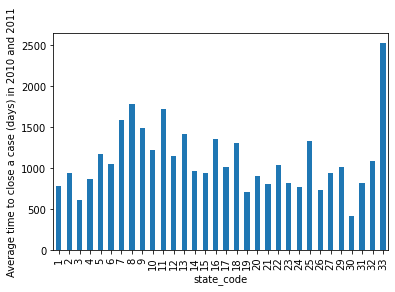

In [41]:
# Convert to date time
case_data['date_of_filing'] = pd.to_datetime(case_data['date_of_filing'], infer_datetime_format=True, errors='coerce')
case_data['date_of_decision'] = pd.to_datetime(case_data['date_of_decision'], infer_datetime_format=True, errors='coerce')

# Add an attribute to the dataframe that calculates the time to close a case in months
case_data['time_to_close'] = (case_data['date_of_decision'] - case_data['date_of_filing']).dt.days 

# Plot bar chart of average time to close a case in each state
case_data.groupby('state_code')['time_to_close'].mean().plot(kind='bar')
plt.ylabel('Average time to close a case (days) in 2010 and 2011')
plt.show()

The graph shows the average time taken for all the cases of years 2010 and 2011 to close in all the states.
An observation is that this time is not very evenly distributed ranging from as low as 350 days to almost 2500 days on average in a state.
This could mean that the judicial system is not very consistent throughout the country.

In [42]:
# get cases where defendant was a female

female_defendant = case_data[case_data['female_defendant'] == '1 female']
male_defendant = case_data[case_data['female_defendant'] == '0 male']
unknown_defendant = case_data[case_data['female_defendant'] == '-9998 unclear']

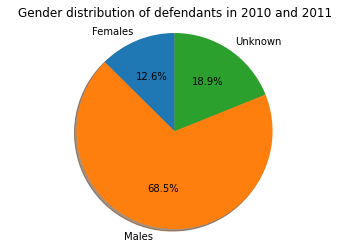

In [43]:
# pie chart in matplotlib


labels = ['Females', 'Males', 'Unknown']

sizes = [female_defendant.shape[0], male_defendant.shape[0], unknown_defendant.shape[0]]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Gender distribution of defendants in 2010 and 2011')
plt.show()

This graph shows the distribution of the gender of defendants in 2010 and 2011.
The result shows us that most of the defendants were male.

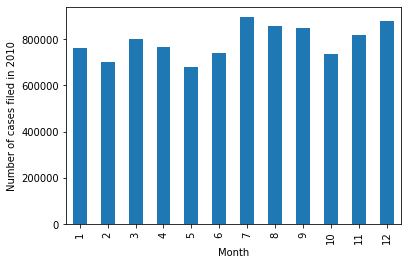

In [44]:
# Group by no of cases filed in each month

case_data.groupby(case_data['date_of_filing'].dt.month)['ddl_case_id'].count().plot(kind='bar')
plt.ylabel('Number of cases filed in 2010')
plt.xlabel('Month')
plt.show()

This graph shows the monthly distribution of date of filing of cases in 2010 and 2011.
The result shows us that this distribution is fairly even as it should be.

In [45]:
judges_data = pd.read_csv('csv/judges_clean.csv')

In [46]:
judges_data.head()

,ddl_judge_id,state_code,dist_code,court_no,judge_position,female_judge,start_date,end_date
0,1,1,1,1,chief judicial magistrate,0 nonfemale,20-09-2013,20-02-2014
1,2,1,1,1,chief judicial magistrate,0 nonfemale,31-10-2013,20-02-2014
2,3,1,1,1,chief judicial magistrate,0 nonfemale,21-02-2014,31-05-2016
3,4,1,1,1,chief judicial magistrate,0 nonfemale,01-06-2016,06-06-2016
4,5,1,1,1,chief judicial magistrate,0 nonfemale,06-06-2016,07-07-2018


In [47]:
judges_data['start_date'] = pd.to_datetime(judges_data['start_date'], infer_datetime_format=True, errors='coerce')
judges_data['end_date'] = pd.to_datetime(judges_data['end_date'], infer_datetime_format=True, errors='coerce')

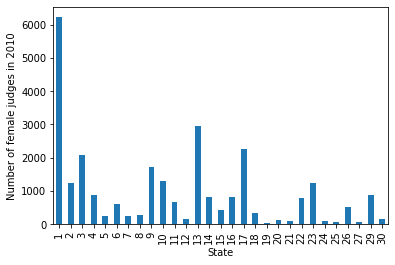

In [48]:
# plot bar graph of number of judges in each state

female_judges = judges_data[judges_data['female_judge'] == '1 female']
female_judges.groupby('state_code')['ddl_judge_id'].count().plot(kind='bar')
plt.ylabel('Number of female judges in 2010')
plt.xlabel('State')
plt.show()

This graph shows us the number of female judges per state for the cases in 2010 and 2011.
The result shows us that in state 1 the number of female judges handling cases is fairly more compared to the other states.

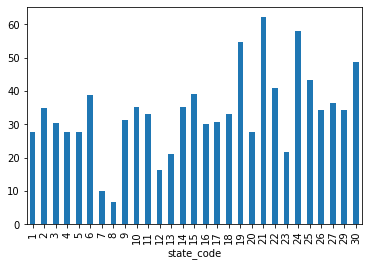

In [49]:
# find % of female judges in each state

percent_female = judges_data[judges_data['female_judge'] == '1 female'].groupby('state_code')['ddl_judge_id'].count() * 100 / judges_data.groupby('state_code')['ddl_judge_id'].count()
percent_female.plot(kind='bar')
plt.show()

As the number of judges might not be give us a very good understanding, we plot the percentage of female judges handling cases in 2010 and 2011.
This shows that though the number is high in state 1, the percentage is not very high and fairly even in all the states.

In [50]:
actions = pd.read_csv('csv/acts_sections.csv',nrows=20000000)
actions = actions[actions['ddl_case_id'].str.endswith('2010') | actions['ddl_case_id'].str.endswith('2011') ]
output = pd.merge(case_data, actions, on='ddl_case_id')
output.drop('number_sections_ipc', axis=1, inplace=True)
# if act is missing, replace it with most frequent act
output = output.fillna(output['act'].value_counts().index[0])
output = output.fillna(output['section'].value_counts().index[0])
print(len(output))

C:\Users\Rohan Chowdary V M\AppData\Local\Temp\ipykernel_2820\4027160881.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  actions = pd.read_csv('csv/acts_sections.csv',nrows=20000000)


1411954


In [51]:
output.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1411954 entries, 0 to 1411953
Data columns (total 24 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   ddl_case_id        1411954 non-null  object        
 1   year               1411954 non-null  int64         
 2   state_code         1411954 non-null  int64         
 3   dist_code          1411954 non-null  int64         
 4   court_no           1411954 non-null  int64         
 5   cino               1411954 non-null  object        
 6   judge_position     1411954 non-null  object        
 7   female_defendant   1411954 non-null  object        
 8   female_petitioner  1411954 non-null  object        
 9   female_adv_def     1411954 non-null  int64         
 10  female_adv_pet     1411954 non-null  int64         
 11  type_name          1411954 non-null  int64         
 12  purpose_name       1411954 non-null  float64       
 13  disp_name          1411954 

In [52]:
output = output.drop(['year', 'court_no', 'cino', 'female_defendant', 'female_petitioner', 'female_adv_def', 'female_adv_pet', 'date_of_filing', 'date_of_decision', 'date_first_list', 'date_next_list', 'time_to_close', 'bailable_ipc'], axis=1)

In [53]:
output.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1411954 entries, 0 to 1411953
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   ddl_case_id     1411954 non-null  object 
 1   state_code      1411954 non-null  int64  
 2   dist_code       1411954 non-null  int64  
 3   judge_position  1411954 non-null  object 
 4   type_name       1411954 non-null  int64  
 5   purpose_name    1411954 non-null  float64
 6   disp_name       1411954 non-null  int64  
 7   date_last_list  1411954 non-null  object 
 8   act             1411954 non-null  float64
 9   section         1411954 non-null  float64
 10  criminal        1411954 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 129.3+ MB


In [54]:
output = output.drop('date_last_list', axis=1)
output = output.drop('judge_position', axis=1)

In [55]:
output = output.drop('ddl_case_id', axis=1)


In [56]:
# output = pd.get_dummies(output)

In [57]:
output.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1411954 entries, 0 to 1411953
Data columns (total 8 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   state_code    1411954 non-null  int64  
 1   dist_code     1411954 non-null  int64  
 2   type_name     1411954 non-null  int64  
 3   purpose_name  1411954 non-null  float64
 4   disp_name     1411954 non-null  int64  
 5   act           1411954 non-null  float64
 6   section       1411954 non-null  float64
 7   criminal      1411954 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 97.0 MB


Now we come to our classification problem.
In this problem, we try to get the cases of 2010 and 2011 and try to check if the case has falsely classified as a criminal case when based on other features, it should not have been the case.
We use the following features to classify the cases:
1. Act
2. Section
3. Type_Name
4. Purpose_Name
5. Disp_Name


We train the model on the cases of 2010 and 2011.

In [58]:
# from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(output.drop('criminal', axis=1), output['criminal'], test_size=0.3, random_state=21)

In [59]:
#bayesian classifier
from sklearn.naive_bayes import GaussianNB
rf = GaussianNB()
rf.fit(x_train, y_train)
rf.score(x_test, y_test)


0.7596219902877095

The Gaussian Model gives an accuracy of 0.76.

In [60]:
#knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn = knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.998444239318015

The KNN model gives us an accuracy of 0.99

Next, based on the test data and predicted data, we check the falsely classified cases.

In [61]:
# get misclassified samples
y_pred = rf.predict(x_test)
misclassified = x_test[y_test != y_pred]
print(misclassified.shape)
misclassified.head()
# for misclassified sample, join date_of_filing and date_of_decision to get time to close
# misclassified = pd.merge(misclassified, case_data[['ddl_case_id', 'date_of_filing', 'date_of_decision']], on='ddl_case_id')
# merge based on indices
misclassified = pd.merge(misclassified, case_data, left_index=True, right_index=True)


(101821, 7)


In [62]:
misclassified.head()

,state_code_x,dist_code_x,type_name_x,purpose_name_x,disp_name_x,act,section,ddl_case_id,year,state_code_y,...,female_adv_pet,type_name_y,purpose_name_y,disp_name_y,date_of_filing,date_of_decision,date_first_list,date_last_list,date_next_list,time_to_close
4,1,1,1429,4882.0,25,4759.0,132871.0,01-01-01-200707000202010,2010,1,...,0,2587,3627.0,42,2010-02-25,2010-11-21,2010-08-06,2010-08-06,2010-11-30,269.0
4,1,1,1429,4882.0,25,4759.0,132871.0,01-01-01-201908000062011,2011,1,...,0,1683,3737.0,30,2011-01-06,2014-05-30,2011-01-27,2014-05-21,2014-05-30,1240.0
6,1,1,1429,4834.0,25,4759.0,132871.0,01-01-01-201908000012010,2010,1,...,0,1429,2237.0,25,2010-01-02,2010-01-11,2010-01-05,2010-01-05,2010-01-11,9.0
6,1,1,1429,4834.0,25,4759.0,132871.0,01-01-01-201908000082011,2011,1,...,-9998,1683,4613.0,43,2011-01-06,2014-02-20,2011-02-28,2014-02-15,2014-02-20,1141.0
8,1,1,1429,3627.0,25,4759.0,132871.0,01-01-01-201908000032010,2010,1,...,0,1429,2237.0,25,2010-01-02,2010-02-11,2010-01-05,2010-01-27,2010-02-11,40.0


We try to compare the average time to close the cases of the falsely classified ones and the entire data set.

In [63]:
case_data['time_to_close'].mean()

991.3183855560995

In [64]:
misclassified['date_of_filing'] = pd.to_datetime(misclassified['date_of_filing'], infer_datetime_format=True, errors='coerce')
misclassified['date_of_decision'] = pd.to_datetime(misclassified['date_of_decision'], infer_datetime_format=True, errors='coerce')
misclassified['time_to_close'] = (misclassified['date_of_decision'] - misclassified['date_of_filing']).dt.days


In [65]:
misclassified['time_to_close'].mean()

746.4893432336331

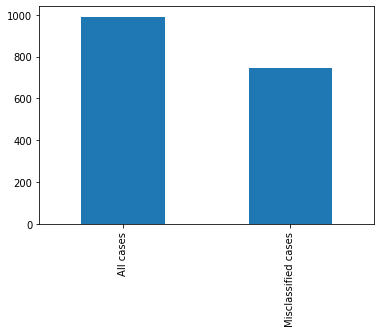

In [66]:
#plot bar graph comparing mean time to close for misclassified and all cases
# create empty dataframe
df = pd.DataFrame(columns=['time_to_close', 'type'])
df['time_to_close'] = [case_data['time_to_close'].mean(), misclassified['time_to_close'].mean()]
df['time_to_close'] = df['time_to_close'].astype(int)
df['type'] = ['All cases', 'Misclassified cases']
df['time_to_close'].plot(kind='bar')
# set first name as all cases and second as misclassified cases
plt.xticks([0,1], df['type'])
plt.show()

We see that the time to close the case is comparatively very low for the falsely classified cases.
This could mean that there are other factors influencing the closure of these cases which is not very honest and could be a sign of corruption in our judicial system.
While it takes approximately 991 days on average to close a case, the falsely classified cases take only 746 days on average to close.
Other factors also play a role in these cases, which could be incompetence of the judges or the lawyers.

Next, we try to see the position of the judges who have misclassified the cases.

In [67]:
# check how many distinct judge_position values there are
print(len(misclassified['judge_position'].unique()))

106


We see that there are 106 unique judge positions where the cases have been misclassified

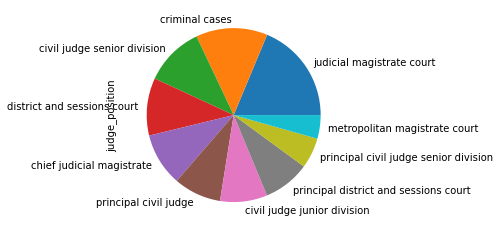

In [68]:
#print(misclassified['judge_position'].value_counts())
# check how many judge_positions have values more than 1000
#print(len(misclassified['judge_position'].value_counts()[misclassified['judge_position'].value_counts() > 3000]))
# plot pie chart of top 10 judge_positions in misclassified samples
misclassified['judge_position'].value_counts()[:10].plot(kind='pie')
plt.show()

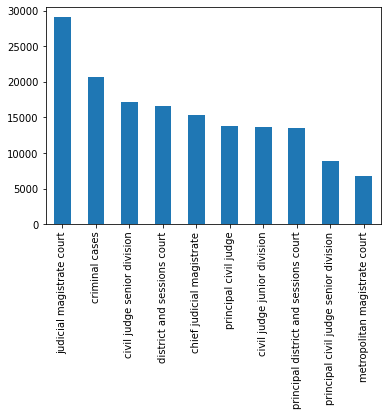

In [69]:
misclassified['judge_position'].value_counts()[:10].plot(kind='bar')
plt.show()

The above plots show us that among the top 10 positions of the judges, judicial magistrate judges have misclassified the most. This could mean that the judges in this position are more likely than others to be corrupt or incompetent. The government could take steps to improve the quality of these judges and how they handle the cases.

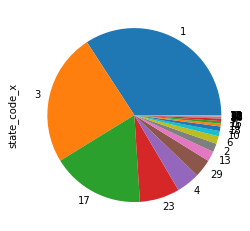

In [70]:
misclassified['state_code_x'].value_counts().plot(kind='pie')
plt.show()

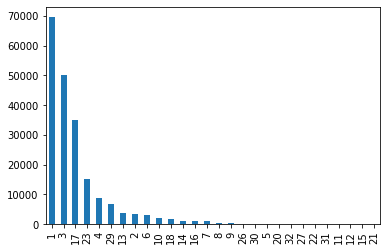

In [71]:
misclassified['state_code_x'].value_counts().plot(kind='bar')
plt.show()

The above plots show that in very few states(3-4), the number of misclassified cases is very high compared to the other states. The above graph showing the distribution of female judges in courts, show that these are the states which have slighly higher number of cases than others. But the proportion by which the number of cases are higher, does not match the proportion by which the number of misclassified cases are higher. This could mean that due to pressure to close the cases fast, as it is a known fact there are a lot of pending cases in India, judges in these cases come up with hasty rulings which are not always right. This could be a reason for the high number of misclassified cases in these states. Of course, there could be other reasons as well such as the quality of the judges in these states, corruption etc.

[[217308  48281]
 [ 53540 104458]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81    265589
           1       0.68      0.66      0.67    157998

    accuracy                           0.76    423587
   macro avg       0.74      0.74      0.74    423587
weighted avg       0.76      0.76      0.76    423587



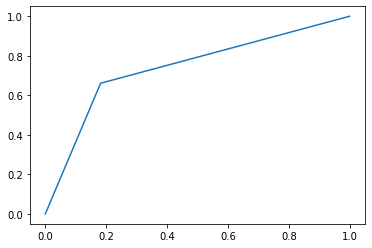

In [72]:
# performance metrics
from sklearn.metrics import roc_curve
def performance(y_pred, y_test):
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    # roc curve
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    roc = roc_curve(y_test, y_pred)
    plt.plot(roc[0], roc[1])
    plt.show()

performance(y_pred, y_test)

We see the performance measure of the model using roc curve, confusion matrix and classification report.